In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [33]:
df = pd.read_csv("/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")

In [34]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [35]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [37]:
df = df.drop(['job_id', 'title', 'location', 'department', 'salary_range','telecommuting', 'has_company_logo', 'has_questions', 'employment_type','required_experience', 'required_education', 'industry', 'function'],axis = 1)


In [38]:
df

,company_profile,description,requirements,benefits,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0
...,...,...,...,...,...
17875,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0
17876,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0
17877,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0
17878,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company_profile  14572 non-null  object
 1   description      17879 non-null  object
 2   requirements     15185 non-null  object
 3   benefits         10670 non-null  object
 4   fraudulent       17880 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 698.6+ KB


In [40]:
df = df.fillna(" ")

In [42]:
df['description'] = df['description'] + " " + df["company_profile"] + " " + df["requirements"] + " " +df["benefits"]

In [43]:
df.head()

,company_profile,description,requirements,benefits,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


In [44]:
df.columns

Index(['company_profile', 'description', 'requirements', 'benefits',
       'fraudulent'],
      dtype='object')

In [48]:
df = df.drop(['company_profile', 'requirements','benefits'],axis =1)

In [49]:
df

,description,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0
1,Organised - Focused - Vibrant - Awesome!Do you...,0
2,"Our client, located in Houston, is actively se...",0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0
...,...,...
17875,Just in case this is the first time you’ve vis...,0
17876,The Payroll Accountant will focus primarily on...,0
17877,Experienced Project Cost Control Staff Enginee...,0
17878,Nemsia Studios is looking for an experienced v...,0


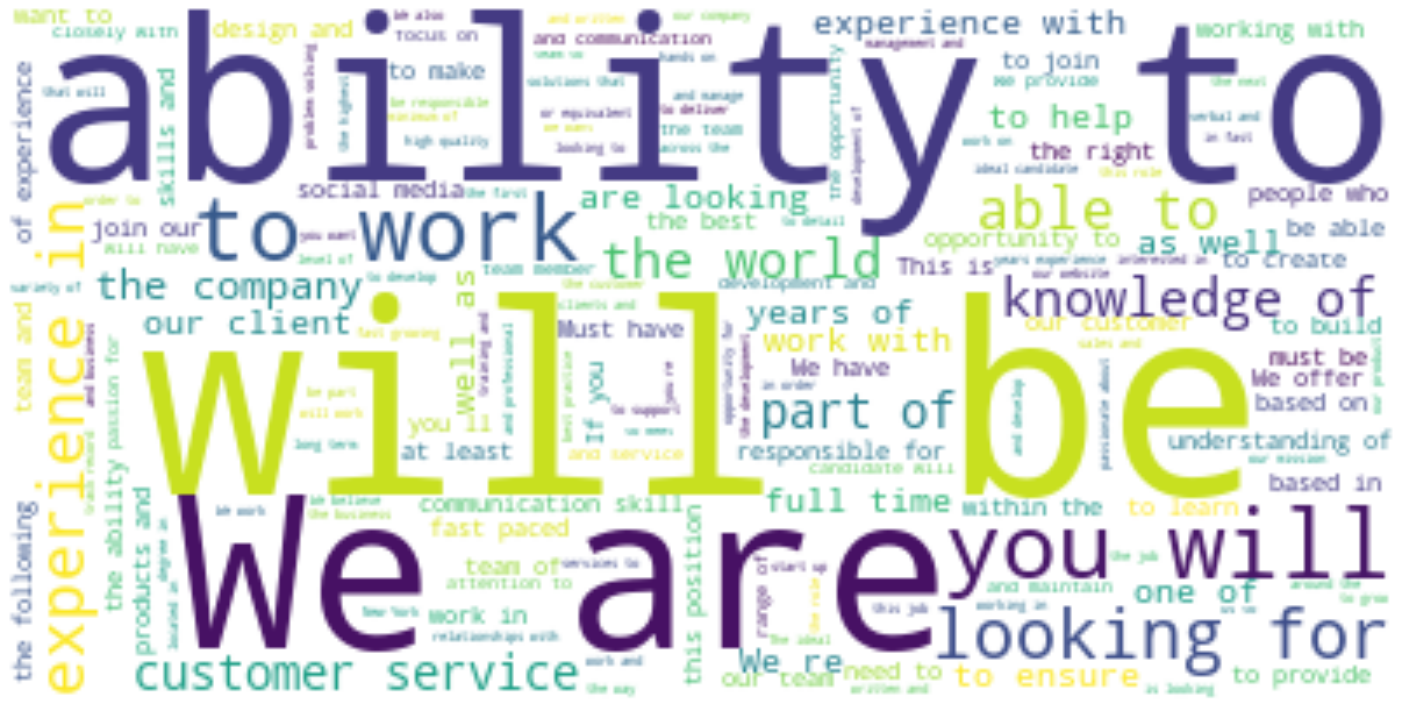

In [57]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
wcf = WordCloud(background_color = 'white',max_words = 2000,stopwords = stopwords )
wcf.generate(" ".join(df['description'])) 
fig = plt.figure()
fig.set_figwidth(25)
fig.set_figheight(20)
plt.imshow(wcf,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [59]:
df.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [60]:
df.columns

Index(['description', 'fraudulent'], dtype='object')

In [61]:
X=df.description.astype('str')
y=df.fraudulent

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocab=3000
tokenizer=Tokenizer(vocab,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)
padded_train=pad_sequences(train_sequence,maxlen=1500)
padded_test=pad_sequences(test_sequence,maxlen=1500)

Using TensorFlow backend.


In [64]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,GlobalAveragePooling1D
from keras.optimizers import Adam

In [66]:
model=Sequential()
model.add(Embedding(vocab,3000))
model.add(GlobalAveragePooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 3000)        9000000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               384128    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,384,257
Trainable params: 9,384,257
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(padded_train,y_train,validation_data=(padded_test,y_test),epochs=10)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 14304 samples, validate on 3576 samples
Epoch 1/10
14304/14304 [==============================] - 11s 735us/step - loss: 0.1835 - accuracy: 0.9499 - val_loss: 0.1039 - val_accuracy: 0.9572
Epoch 2/10
14304/14304 [==============================] - 9s 659us/step - loss: 0.0965 - accuracy: 0.9660 - val_loss: 0.0764 - val_accuracy: 0.9813
Epoch 3/10
14304/14304 [==============================] - 9s 656us/step - loss: 0.0667 - accuracy: 0.9776 - val_loss: 0.0557 - val_accuracy: 0.9815
Epoch 4/10
14304/14304 [==============================] - 9s 661us/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0545 - val_accuracy: 0.9829
Epoch 5/10
14304/14304 [==============================] - 9s 656us/step - loss: 0.0377 - accuracy: 0.9871 - val_loss: 0.0707 - val_accuracy: 0.9754
Epoch 6/10
14304/14304 [==============================] - 9s 664us/step - loss: 0.0306 - accuracy: 0.9887 - val_loss: 0.0618 - val_accuracy: 0.9829
Epoch 7/10
14304/14304 [==============================] - 9s 6

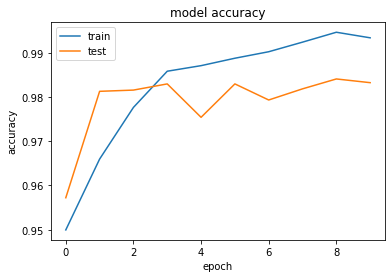

In [78]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()